In [1]:
import matplotlib.pyplot as plt
import torch
import torchbearer

from dataset.correlation_dataset import CorrelationDataset
from torch.utils.data import DataLoader
from torch import nn
from torch import optim
from torchbearer import Trial
from torch.nn.functional import relu

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

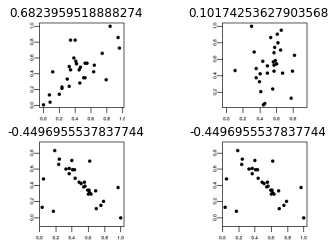

In [2]:
dataset = CorrelationDataset('./data/train_imgs', './data/train_responses.csv', 100)
trainset, testset = torch.utils.data.random_split(dataset, [int(0.7 * len(dataset)), int(0.3 * len(dataset))])
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=16, shuffle=True)

plt.subplot(221)
plt.axis('off')
plt.title(dataset[0][1])
plt.imshow(dataset[0][0][0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.axis('off')
plt.title(dataset[5][1])
plt.imshow(dataset[5][0][0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.axis('off')
plt.title(dataset[12][1])
plt.imshow(dataset[12][0][0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.axis('off')
plt.title(dataset[12][1])
plt.imshow(dataset[12][0][0], cmap=plt.get_cmap('gray'))

In [8]:
class BaselineModel(nn.Module):
  def __init__(self):
    super(BaselineModel, self).__init__()
    self.conv1 = nn.Conv2d(1, 48, (3, 3), stride=1, padding=1)
    self.fc1 = nn.Linear(48 * 150**2, 128)
    self.fc2 = nn.Linear(128, 1)

  def forward(self, x):
    out = self.conv1(x)
    out = relu(out)
    out = out.view(out.shape[0], -1)
    out = self.fc1(out)
    out = relu(out)
    out = self.fc2(out)
    return out

In [4]:
loss_function = nn.MSELoss()

In [9]:
baseline_model = BaselineModel()
optimiser = optim.Adam(baseline_model.parameters(), lr=0.01)

trial = Trial(baseline_model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)


{'test_loss': 18.74515151977539, 'test_mse': 18.80177116394043}
